## **Video Game Sales Analysis Project**

This project analyzes global video game sales data with the goal of identifying the factors that determine a game’s commercial success. The dataset includes information such as platform, genre, release year, regional sales (NA, EU, JP, Other), user and critic reviews, and ESRB ratings.

The analysis simulates a real-world business scenario: planning a marketing campaign for 2017 based on historical sales data up to 2016. The project involves the following key steps:

**Data Preparation:** Cleaning and transforming the dataset by handling missing values, converting data types, and calculating total sales.

**Exploratory Data Analysis:** Identifying sales trends across platforms and genres, evaluating the life cycle of gaming platforms, and assessing the impact of critic and user reviews on sales performance.

**Regional Profiling:** Building consumer profiles for North America, Europe, and Japan by comparing the top platforms, genres, and the influence of ESRB ratings in each region.

**Hypothesis Testing:** Applying statistical tests to compare average user ratings across platforms (e.g., Xbox One vs. PC) and genres (e.g., Action vs. Sports).

**Insights & Recommendations:** Highlighting promising platforms and genres for future campaigns, as well as strategic differences between markets.

The project demonstrates practical skills in data cleaning, exploratory analysis, visualization, and statistical hypothesis testing using Python and Jupyter Notebook, while providing actionable insights for the video game industry.

----

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Create dataframe from csv file
games = pd.read_csv("games.csv")
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#Change column names to lowercase
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Check nulls in 'name'
print(games[games["name"].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Within the "name" and "genre" columns, null values could be set to "Unknown," since only two games don't have a title or genre, but most of the other criteria do. The other columns could be set to 0 first for columns that require an object change, such as "year_of_release" and "user_score." This would require checking for any hidden strings that would prevent the object change. I don't think null values in the Score columns would be important, since they won't affect arithmetic operations for subsequent analysis.

In [5]:
#Change from null to Unknown in 'name'
games["name"] = games["name"].fillna("Unknown")
#Change from null to Unknown in 'genre'
games["genre"] = games["genre"].fillna("Unknown")
#Fill nulls in 'year_of_release'
games["year_of_release"] = games["year_of_release"].fillna(0)
#Change dtype in 'year_of_release'
games["year_of_release"] = games["year_of_release"].astype(int)
#Change from 0 to Unknown in 'year_of_release'
games["year_of_release"] = games["year_of_release"].replace(0, "Unknown")
#Check changes
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


When trying to convert a string to a float, an error occurred stating that a string cannot be converted to a float or int. Therefore, a string must be preventing the object from being changed, so the unique values will be checked and the string will be converted to a float type.

In [6]:
#Check unique values in 'user_score'
print("Unique Values 'User Score':\n", games["user_score"].unique())

Unique Values 'User Score':
 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [7]:
#Change string to null
games["user_score"] = games["user_score"].replace("tbd", None)

The "tbd" string was changed to None since the game didn't have a rating assigned anyway.

In [8]:
#Check changes
print("Unique Values 'User Score':\n", games["user_score"].unique())

Unique Values 'User Score':
 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' None '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [9]:
#Change from string to float
games["user_score"] = games["user_score"].astype(float)
#Check df 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
#Check unique values in 'rating'
print("Unique Values 'User Score':\n", games["rating"].unique())

Unique Values 'User Score':
 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [11]:
#Change nulls to RP
games["rating"] = games["rating"].fillna("Unkwnown")
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The missing values (at least for the "critic_score", "user_score", and "rating" columns) may be due to the fact that they have not yet been rated, or the final score or ranking has not been published by December 2016 (which is why the null values were replaced by "RP" (Review Pending) in rate, since it was not defined until then). As for the game year, name, and genre, this may be due to an omission in the database entry.

In [12]:
#Create 'total_sales' adding NA, EU and JP's sales
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unkwnown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unkwnown,31.38


In [13]:
#Check duplicates
print("Duplicates: ", games.duplicated().sum())

Duplicates:  0


In [14]:
#Find how many years were lounched per year
games_by_year = games.groupby("year_of_release")["name"].count()
print(games_by_year)

year_of_release
1980          9
1981         46
1982         36
1983         17
1984         14
1985         14
1986         21
1987         16
1988         15
1989         17
1990         16
1991         41
1992         43
1993         62
1994        121
1995        219
1996        263
1997        289
1998        379
1999        338
2000        350
2001        482
2002        829
2003        775
2004        762
2005        939
2006       1006
2007       1197
2008       1427
2009       1426
2010       1255
2011       1136
2012        653
2013        544
2014        581
2015        606
2016        502
Unknown     269
Name: name, dtype: int64


The video game industry grew steadily from 1980 until 1993 when the number of video games released doubled, the increase was also constant until 2002 when releases doubled again, reaching a peak of 1,427 games released in 2008 followed by 2009 with 1,426, then it seems that from 2012 until 2016 releases have dropped somewhat precipitously for the short period of time since its peak until 2016 with only over a third of the games released that used to be released in 2008-2009.

In [15]:
#Group sales by platfrom descending
sales_by_platform = games.groupby("platform")["total_sales"].sum()
print(sales_by_platform.sort_values(ascending = False))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


It was found that PS2, XBox 360, PS3, Wii and DS are the 5 platforms with the highest sales, so they will be worked with in the next part of the analysis.

In [16]:
#Group platforms´ sales by year
sales_by_platform_year = games.groupby(["platform", "year_of_release"])["total_sales"].sum()
print(sales_by_platform_year)

platform  year_of_release
2600      1980               11.38
          1981               35.68
          1982               28.88
          1983                5.84
          1984                0.27
                             ...  
XB        Unknown             6.17
XOne      2013               18.96
          2014               54.07
          2015               60.14
          2016               26.15
Name: total_sales, Length: 254, dtype: float64


In [17]:
#PS2 Annual sales
sales_by_platform_year = sales_by_platform_year.reset_index()
ps2_year = sales_by_platform_year[(sales_by_platform_year["platform"] == "PS2")]
print(ps2_year)

    platform year_of_release  total_sales
139      PS2            2000        39.17
140      PS2            2001       166.43
141      PS2            2002       205.38
142      PS2            2003       184.31
143      PS2            2004       211.81
144      PS2            2005       160.66
145      PS2            2006       103.42
146      PS2            2007        75.99
147      PS2            2008        53.90
148      PS2            2009        26.40
149      PS2            2010         5.64
150      PS2            2011         0.45
151      PS2         Unknown        22.21


<Axes: title={'center': 'Yearly Sales PS2'}, xlabel='Year', ylabel='Sales (MUSD)'>

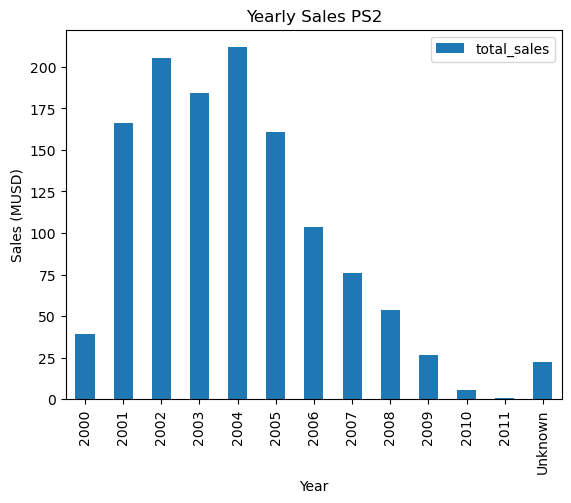

In [18]:
#Plot PS2 annual sales
ps2_year.plot(kind = "bar", x = "year_of_release", y = "total_sales", xlabel = "Year", ylabel = "Sales (MUSD)", title = "Yearly Sales PS2")

In [19]:
#XBox 360 annual sales
x360_year = sales_by_platform_year[(sales_by_platform_year["platform"] == "X360")]
print(x360_year)

    platform year_of_release  total_sales
227     X360            2005         8.25
228     X360            2006        51.62
229     X360            2007        95.41
230     X360            2008       135.26
231     X360            2009       120.29
232     X360            2010       170.03
233     X360            2011       143.84
234     X360            2012        99.74
235     X360            2013        88.58
236     X360            2014        34.74
237     X360            2015        11.96
238     X360            2016         1.52
239     X360         Unknown        10.18


<Axes: title={'center': 'Yearly Sales XBox 360'}, xlabel='Year', ylabel='Sales (MUSD)'>

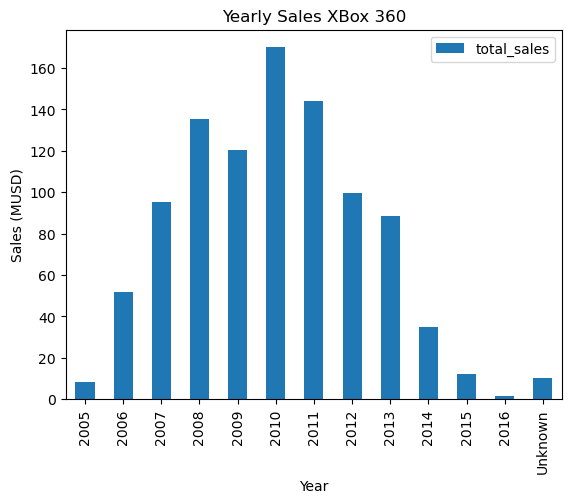

In [20]:
#Plot XBox 360 annual sales
x360_year.plot(kind = "bar", x = "year_of_release", y = "total_sales", xlabel = "Year", ylabel = "Sales (MUSD)", title = "Yearly Sales XBox 360")

In [21]:
#Wii annual sales
wii_year = sales_by_platform_year[(sales_by_platform_year["platform"] == "Wii")]
print(wii_year)

    platform year_of_release  total_sales
210      Wii            2006       137.15
211      Wii            2007       152.77
212      Wii            2008       171.32
213      Wii            2009       206.97
214      Wii            2010       127.95
215      Wii            2011        59.65
216      Wii            2012        21.71
217      Wii            2013         8.59
218      Wii            2014         3.75
219      Wii            2015         1.14
220      Wii            2016         0.18
221      Wii         Unknown        16.33


<Axes: title={'center': 'Yearly Sales Wii'}, xlabel='Year', ylabel='Sales (MUSD)'>

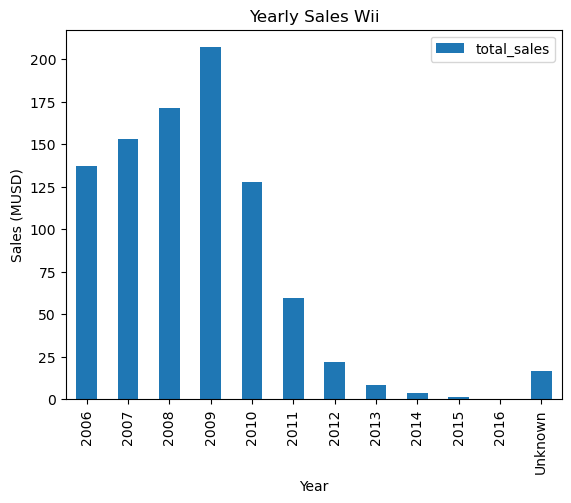

In [22]:
#Plot Wii annual sales
wii_year.plot(kind = "bar", x = "year_of_release", y = "total_sales", xlabel = "Year", ylabel = "Sales (MUSD)", title = "Yearly Sales Wii")

In [23]:
#PS3 annual sales
ps3_year = sales_by_platform_year[(sales_by_platform_year["platform"] == "PS3")]
print(ps3_year)

    platform year_of_release  total_sales
152      PS3            2006        20.96
153      PS3            2007        73.19
154      PS3            2008       118.52
155      PS3            2009       130.93
156      PS3            2010       142.17
157      PS3            2011       156.78
158      PS3            2012       107.36
159      PS3            2013       113.25
160      PS3            2014        47.76
161      PS3            2015        16.82
162      PS3            2016         3.60
163      PS3         Unknown         8.31


<Axes: title={'center': 'Yearly Sales PS3'}, xlabel='Year', ylabel='Sales (MUSD)'>

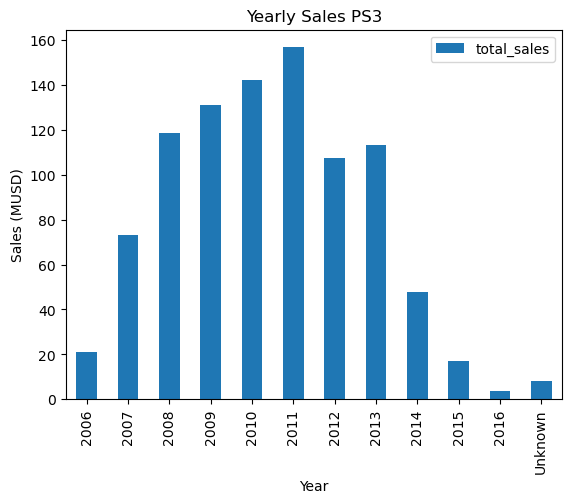

In [24]:
#Plot PS3 annual sales
ps3_year.plot(kind = "bar", x = "year_of_release", y = "total_sales", xlabel = "Year", ylabel = "Sales (MUSD)", title = "Yearly Sales PS3")

In [25]:
#DS annual Sales
ds_year = sales_by_platform_year[(sales_by_platform_year["platform"] == "DS")]
print(ds_year)

   platform year_of_release  total_sales
27       DS            1985         0.02
28       DS            2004        17.27
29       DS            2005       130.14
30       DS            2006       119.81
31       DS            2007       146.94
32       DS            2008       145.31
33       DS            2009       119.54
34       DS            2010        85.02
35       DS            2011        26.18
36       DS            2012        11.01
37       DS            2013         1.54
38       DS         Unknown         3.34


<Axes: title={'center': 'Yearly Sales DS'}, xlabel='Year', ylabel='Sales (MUSD)'>

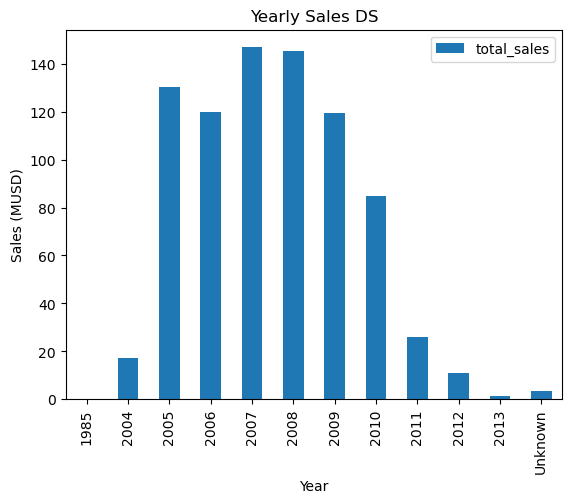

In [26]:
#Plot DS annual sales
ds_year.plot(kind = "bar", x = "year_of_release", y = "total_sales", xlabel = "Year", ylabel = "Sales (MUSD)", title = "Yearly Sales DS")

In [27]:
#New df filtered by platforms with greatest sales
top_platforms = sales_by_platform_year[(sales_by_platform_year["platform"] == "PS2") |
    (sales_by_platform_year["platform"] == "X360") |
    (sales_by_platform_year["platform"] == "Wii") | 
    (sales_by_platform_year["platform"] == "PS3") | 
    (sales_by_platform_year["platform"] == "DS")]
#Check
top_platforms.sample(20)

,platform,year_of_release,total_sales
229,X360,2007,95.41
230,X360,2008,135.26
139,PS2,2000,39.17
220,Wii,2016,0.18
142,PS2,2003,184.31
34,DS,2010,85.02
37,DS,2013,1.54
152,PS3,2006,20.96
159,PS3,2013,113.25
30,DS,2006,119.81


<Axes: title={'center': 'Yearly Sales by Platform'}, xlabel='Year of Release', ylabel='Total Sales (MUSD)'>

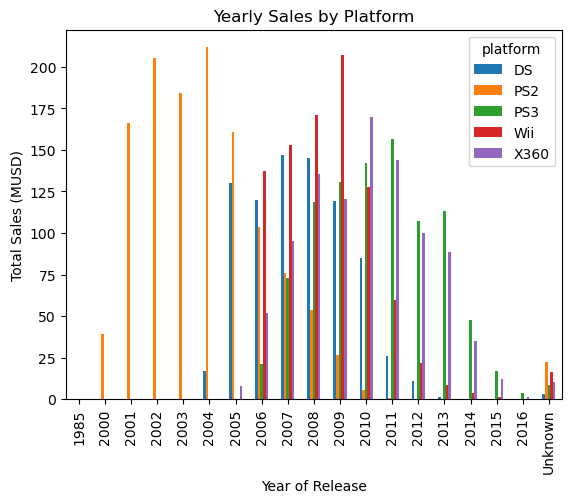

In [28]:
#Group platforms´ sales by year
top_platforms_year = top_platforms.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack()
#Plot grouped df
top_platforms_year.plot(kind = "bar", xlabel = "Year of Release", 
                        ylabel = "Total Sales (MUSD)", legend = "Platform",
                        title = "Yearly Sales by Platform")

It seems that new platforms took one to two years to appear on the gaming scene—by which I mean reaching more than $25 million in sales. On the other hand, established platforms tend to disappear around five years after their peak sales. This can be seen in most cases, with the clearest examples being Nintendo's DS and Wii. These reached their peak sales in the mid-to-late 2000s, and by 2013 to 2015, they had already disappeared.

I believe a 5-year period is sufficient to determine a trend for 2017. I would use data from 2012 to 2016, as this would give us a good perspective on the world of video games in the recent past, present, and near future.

In [29]:
#Replace Unknown to 0 to apply numeric filters
sales_by_platform_year["year_of_release"] = sales_by_platform_year["year_of_release"].replace("Unknown", 0).astype(int)
sales_by_platform_year = sales_by_platform_year.infer_objects(copy=False)

C:\Users\felix\AppData\Local\Temp\ipykernel_13708\558615091.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales_by_platform_year["year_of_release"] = sales_by_platform_year["year_of_release"].replace("Unknown", 0).astype(int)


In [30]:
#Change 'year_of_release' dtype
sales_by_platform_year["year_of_release"] = sales_by_platform_year["year_of_release"].astype(int)
#Filter sales data from 2012
sales_from_2012 = sales_by_platform_year[(sales_by_platform_year["year_of_release"] >= 2012)]
#Check
sales_from_2012.info()
sales_from_2012.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 14 to 253
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         49 non-null     object 
 1   year_of_release  49 non-null     int32  
 2   total_sales      49 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.3+ KB


,platform,year_of_release,total_sales
251,XOne,2014,54.07
182,PSV,2012,16.19
14,3DS,2012,51.36
234,X360,2012,99.74
166,PS4,2015,118.90
235,X360,2013,88.58
223,WiiU,2013,21.65
226,WiiU,2016,4.60
15,3DS,2013,56.57
236,X360,2014,34.74


<Axes: title={'center': 'Sales by Platform 2012 - 2016'}, xlabel='Year', ylabel='Sales (MUSD)'>

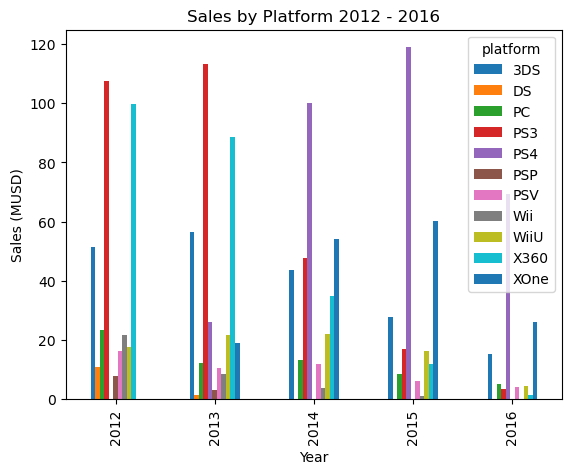

In [31]:
#Group sales from 2012
sales_from_2012_grouped = sales_from_2012.groupby(["year_of_release", "platform"])["total_sales"].sum().unstack()
#Plot
sales_from_2012_grouped.plot(kind = "bar", xlabel = "Year", ylabel = "Sales (MUSD)", title = "Sales by Platform 2012 - 2016")

PlayStation seems to be the sales leader, rebounding after the release of the PS4, relegating the PS3, as well as XBox with the X360, which almost disappeared in 2016, and the release of the XOne. Nintendo's Wii, Wii U, DS, and 3DS have seen a significant drop in sales, especially considering the disappearance of the Wii and DS, and the significant decline of the Wii U.
I believe the most profitable for 2017 would be the PS4 and XOne.

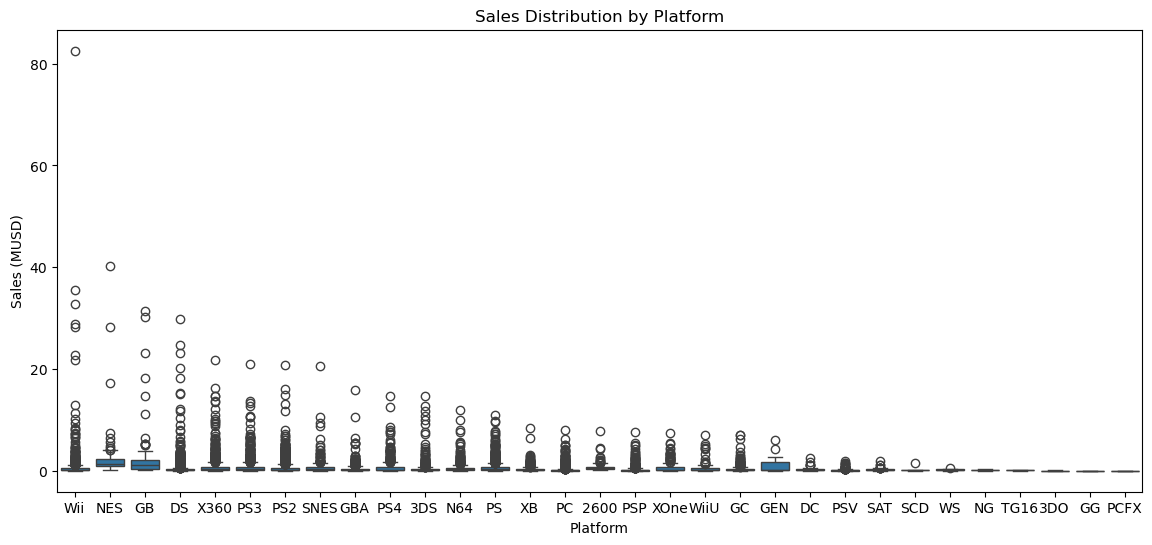

In [32]:
#Boxplot per platform
plt.figure(figsize=(14, 6))
sns.boxplot(data = games, x = "platform", y = "total_sales")
plt.xlabel("Platform")
plt.ylabel("Sales (MUSD)")
plt.title("Sales Distribution by Platform")
plt.show()

There are significant differences between sales across platforms, it's clear that the most popular platforms had many outliers, such as the Wii, which earned over $70 million with a single game. Other platforms also had highly successful games, though they were few, as can be seen in the outliers. The other games that contribute to the average sales figure (which are the majority) are those included in the box, which indicates that they weren't as popular or were simply older games, not even reaching $5 million.

Correlación Ventas - Critic Score:  0.406567902061781


<Axes: title={'center': 'Sales v Critic Score'}, xlabel='Critic Score', ylabel='Sales (MUSD)'>

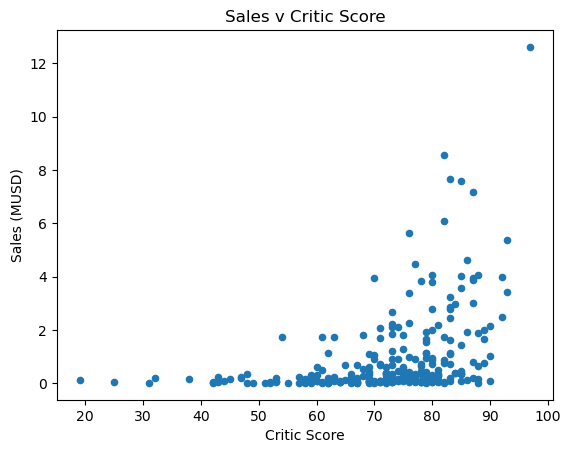

In [33]:
#PS4 df
ps4 = games[(games["platform"] == "PS4")]
cor_critics = ps4["total_sales"].corr(ps4["critic_score"])
#'critic_score' - 'total_sales' correlation
print("Correlación Ventas - Critic Score: ", cor_critics)
#Scatterplot
ps4.plot(kind = "scatter", x = "critic_score", y = "total_sales", xlabel = "Critic Score", ylabel = "Sales (MUSD)", title = "Sales v Critic Score")

It can be said that critic scores have a slightly positive impact on sales, as a correlation of 0.4 was obtained. However, there are a considerable number of games with favorable scores and low sales compared to commercial successes. Based on this result, it can be said that if a game is highly scored by critics, it may have good sales; however, it does not guarantee that it will be a commercial success.

Correlación Ventas - User Score:  -0.031957110204556376


<Axes: title={'center': 'Sales v User Score'}, xlabel='User Score', ylabel='Sales (MUSD)'>

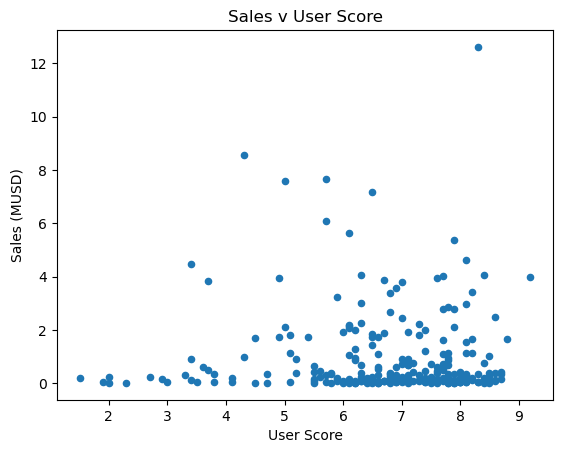

In [34]:
cor_users = ps4["total_sales"].corr(ps4["user_score"])
#'user_score' - 'total_sales' correlation
print("Correlación Ventas - User Score: ", cor_users)
#Plot
ps4.plot(kind = "scatter", x = "user_score", y = "total_sales", xlabel = "User Score", ylabel = "Sales (MUSD)", title = "Sales v User Score")

It can be said that user scores do not affect sales in any way, as a correlation of -0.02 was obtained. There are some games with average and poor scores that achieve considerable, above-average sales, and as with the previous example of critic scores, there are games with favorable scores that sell poorly compared to commercial successes. Therefore, whether a game receives a positive or negative user score does not guarantee commercial success or failure.

In [35]:
#Group PS4 popular games
ps4_top_games = ps4.groupby("name")["total_sales"].sum().sort_values(ascending = False)
print(ps4_top_games)

name
Call of Duty: Black Ops 3         14.63
Grand Theft Auto V                12.62
FIFA 16                            8.58
Star Wars Battlefront (2015)       7.98
Call of Duty: Advanced Warfare     7.66
                                  ...  
Prototype: Biohazard Bundle        0.01
Professional Farmer 2016           0.01
Chaos;Child                        0.01
Carmageddon: Max Damage            0.01
Dungeons 2                         0.01
Name: total_sales, Length: 392, dtype: float64


<Axes: title={'center': "Games' Sales by Platform"}, xlabel='Game', ylabel='Sales'>

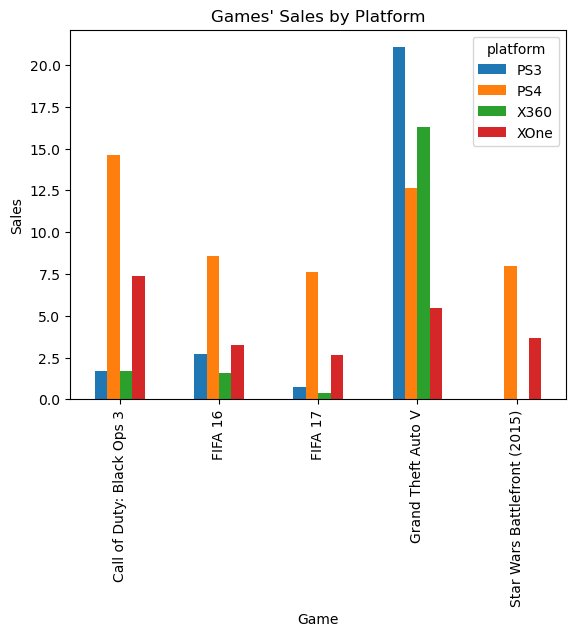

In [36]:
#Compare games from other successful platforms
#Filter by platform
games_by_platform = games[(games["platform"] == "PS4") | 
    (games["platform"] == "X360") | 
    (games["platform"] == "PS3") | 
    (games["platform"] == "XOne")]
#Filter by game
games_by_plat_game = games_by_platform[(games_by_platform["name"] == "Call of Duty: Black Ops 3" ) | 
    (games_by_platform["name"] == "Grand Theft Auto V") | 
    (games_by_platform["name"] == "FIFA 16") | 
    (games_by_platform["name"] == "Star Wars Battlefront (2015)") |
    (games_by_platform["name"] == "FIFA 17")]
#Group by game and platform
games_by_plat_comp = games_by_plat_game.groupby(["name", "platform"])["total_sales"].sum().unstack()
#Plot
games_by_plat_comp.plot(kind = "bar", xlabel = "Game", ylabel = "Sales", title = "Games' Sales by Platform")

PS4 leads the sales of the most popular games, especially FIFA 16 and 17 and COD: Black Ops 3. However, PS3 and XBox 360 are the leaders in GTA V. As for Star Wars Battlefront, a good analysis cannot be made since it is only available on PS4 and XBox One. In conclusion, Play Station dominates the sales of the most popular games, leaving XBox slightly behind. It may be that users prefer to play COD and FIFA on Play Station and GTA on Xbox due to the benefits that each platform offers and the needs of the games.

<Axes: title={'center': 'Sales by Genre'}, xlabel='Genre', ylabel='Sales (MUSD)'>

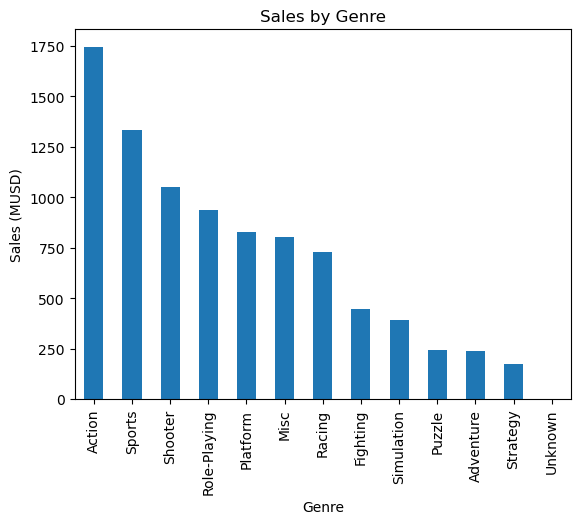

In [37]:
#Group by genre
genre_comp = games.groupby("genre")["total_sales"].sum().sort_values(ascending = False)
#Plot
genre_comp.plot(kind = "bar", xlabel = "Genre", ylabel = "Sales (MUSD)", title = "Sales by Genre")

The most profitable genres are Action and Sports, while the least profitable are Adventure and Strategy. Action and Sports offer competition and adrenaline for viewers, plus the advantages of both in-person and online multiplayer. Adventure and Strategy require slower analysis than Action and Sports, and they also lack multiplayer.

In [38]:
#Group platforms by region
na_platforms = games.groupby("platform")["na_sales"].sum()
eu_platforms = games.groupby("platform")["eu_sales"].sum()
jp_platforms = games.groupby("platform")["jp_sales"].sum()

In [39]:
#Convert series to df
na = na_platforms.to_frame()
#Create 'market_share' and sort
na["mk_share"] = (na["na_sales"] / na["na_sales"].sum()) * 100
na = na.sort_values(by = "na_sales", ascending = False)
#Check
na.head()

,na_sales,mk_share
platform,,
X360,602.47,13.685191
PS2,583.84,13.262008
Wii,496.90,11.287153
PS3,393.49,8.938181
DS,382.40,8.686270


In [40]:
#Convert series to df
eu = eu_platforms.to_frame()
#Create 'market_share' and sort
eu["mk_share"] = (eu["eu_sales"] / eu["eu_sales"].sum()) * 100
eu = eu.sort_values(by = "eu_sales", ascending = False)
#Check
eu.head()

,eu_sales,mk_share
platform,,
PS2,339.29,13.993244
PS3,330.29,13.622060
X360,270.76,11.166880
Wii,262.21,10.814255
PS,213.61,8.809859


In [41]:
#Convert series to df
jp = jp_platforms.to_frame()
##Create 'market_share' and sort
jp["mk_share"] = (jp["jp_sales"] / jp["jp_sales"].sum()) * 100
jp = jp.sort_values(by = "jp_sales", ascending = False)
#Check
jp.head()

,jp_sales,mk_share
platform,,
DS,175.57,13.532762
PS,139.82,10.777188
PS2,139.20,10.729399
SNES,116.55,8.983559
3DS,100.67,7.759544


While XBox and Nintendo are among the most popular in Europe and North America, XBox hasn't had the same luck in Japan. In this region, Play Station and Nintendo are the strongest, although the Wii no longer appears among the most popular, although the DS and 3DS do. It could be said that Play Station is the most popular, with a high market share in all three regions: 21% in North America, 36% in the US, and 21% in Japan. XBox only has 13% in North America, 11% in the US, and isn't even in the Top 5 in Japan. Nintendo has a more stable market share, with 21% in North America, 10% in the US, and 21% in Japan. Arguably, the top platforms globally are:
1. Play Station
2. Nintendo
3. XBox

In [42]:
#Group genres by region
na_genres = games.groupby("genre")["na_sales"].sum()
eu_genres = games.groupby("genre")["eu_sales"].sum()
jp_genres = games.groupby("genre")["jp_sales"].sum()

In [43]:
#Sort for NA
print(na_genres.sort_values(ascending = False))

genre
Action          879.01
Sports          684.43
Shooter         592.24
Platform        445.50
Misc            407.27
Racing          359.35
Role-Playing    330.81
Fighting        223.36
Simulation      181.92
Puzzle          122.87
Adventure       105.26
Strategy         68.55
Unknown           1.78
Name: na_sales, dtype: float64


In [44]:
#Sort for EU
print(eu_genres.sort_values(ascending = False))

genre
Action          519.13
Sports          376.79
Shooter         317.34
Racing          236.51
Misc            212.74
Platform        200.35
Role-Playing    188.71
Simulation      113.52
Fighting        100.33
Adventure        63.54
Puzzle           50.01
Strategy         45.17
Unknown           0.53
Name: eu_sales, dtype: float64


In [45]:
#Sort for JP
print(jp_genres.sort_values(ascending = False))

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Fighting         87.48
Simulation       63.80
Puzzle           57.31
Racing           56.71
Adventure        52.30
Strategy         49.66
Shooter          38.76
Unknown           0.03
Name: jp_sales, dtype: float64


For all three regions, action and sports are the most popular genres, ranking in the top three. Miscellaneous is among the top five in all three regions, holding a solid fifth place in all three. Arguably, action, sports, and miscellaneous are the most popular genres worldwide, followed by platform and racing, which each rank in the top five in two regions. Meanwhile, shooting and role-playing are only popular regionally, with shooting only in the top three in NA and role-playing only in JP.

In [46]:
#Group 'rating' per region
na_rating = games.groupby("rating")["na_sales"].sum()
eu_rating = games.groupby("rating")["eu_sales"].sum()
jp_rating = games.groupby("rating")["jp_sales"].sum()

<Axes: title={'center': 'Rating Sales NA'}, xlabel='Rating', ylabel='Sales (MUSD)'>

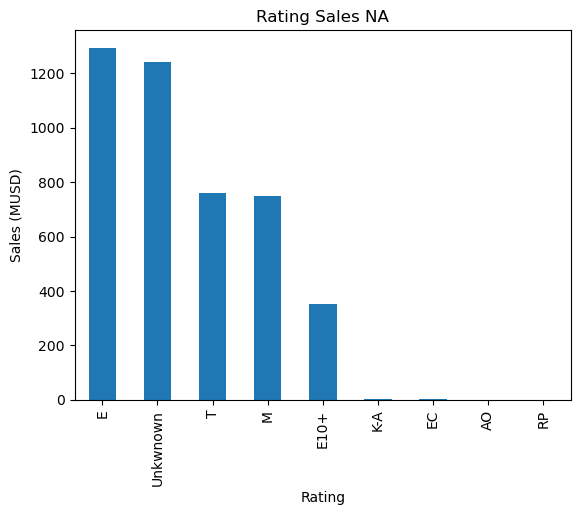

In [47]:
#Sort and plot NA
na_rating = na_rating.sort_values(ascending = False)
na_rating.plot(kind = "bar", xlabel = "Rating", ylabel = "Sales (MUSD)", title = "Rating Sales NA")

<Axes: title={'center': 'Rating Sales EU'}, xlabel='Rating', ylabel='Sales (MUSD)'>

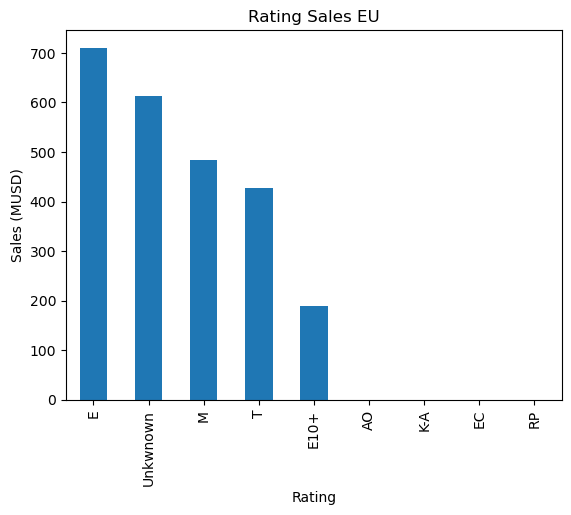

In [48]:
#Sort and plot EU
eu_rating = eu_rating.sort_values(ascending = False)
eu_rating.plot(kind = "bar", xlabel = "Rating", ylabel = "Sales (MUSD)", title = "Rating Sales EU")

<Axes: title={'center': 'Rating Sales JP'}, xlabel='Rating', ylabel='Sales (MUSD)'>

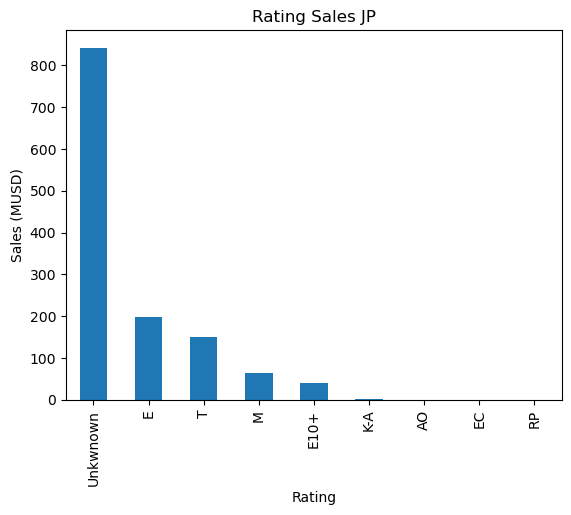

In [49]:
#Sort and plot JP
jp_rating = jp_rating.sort_values(ascending = False)
jp_rating.plot(kind = "bar", xlabel = "Rating", ylabel = "Sales (MUSD)", title = "Rating Sales JP")

The most popular rating is E (general audiences), as it ranks first in all regions, followed by T (teen) and then M (mature audiences). However, a shift can be seen in the EU, where M ranks second and T third. There are many games, especially in JP, that aren't rated, so it's worth checking if several of them have an RP rating. This lack of information may be due to an omission during data collection.
(I'm not sure if some ratings should be changed to others, like K-A, which sounds like Kids & Adults and could fall under E, and EC, which I'm not sure could be E or E10+.)

In [50]:
#Compare XBox One and PC
#Filter by XOne
xone = games[(games["platform"] == "XOne")]
#Drop nulls
xone_score = xone["user_score"].dropna()
#Filter by PC
pc = games[(games["platform"] == "PC")]
#Drop nulls
pc_score = pc["user_score"].dropna()
#Student´s Test
#H0: The average user scores for the Xbox One and PC platforms are the same.
#H1: The average user scores for the Xbox One and PC platforms differ.
alpha = 0.05
ttest_h0 = st.ttest_ind(xone_score, pc_score, equal_var = False)
#Result
print("P Value: ", ttest_h0.pvalue)
if ttest_h0.pvalue < alpha:
    print("Reject H0")
    print("Therefore, the average scores for Xbox One and PC are different.")
else:
    print("H0 can't be rejected")
    print("Therefore, the average scores for Xbox One and PC are similar.")

P Value:  4.935072360183574e-06
Reject H0
Therefore, the average scores for Xbox One and PC are different.


In [51]:
xone_mean = xone_score.mean()
print("XBox One User Score Mean: ", xone_mean)
pc_mean = pc_score.mean()
print("PC User Score Mean: ", pc_mean)

XBox One User Score Mean:  6.521428571428572
PC User Score Mean:  7.062467532467533


In [52]:
#Compare Action and Sports
#Filter by Action
action = games[(games["genre"] == "Action")]
action_score = action["user_score"].dropna()
#Filter by Sports
sports = games[(games["genre"] == "Sports")]
sports_score = sports["user_score"].dropna()
#Student´s test
#H0: The average user scores for Action and Sports genres are the same. 
#H1: The average user scores for Action and Sports genres differ. 
ttest_h0 = st.ttest_ind(action_score, sports_score, equal_var = True)
print("P value: ", ttest_h0.pvalue)
if ttest_h0.pvalue < alpha:
    print("Reject H0")
    print("Therefore, the average scores for the Action and Sports genres are different.")
else:
    print("H0 can't be rejected")
    print("Therefore, the average scores for the Action and Sports genres are the same.")

P value:  0.10406951359049141
H0 can't be rejected
Therefore, the average scores for the Action and Sports genres are the same.


In [53]:
action_mean = action_score.mean()
print("Media User Score Accion: ", action_mean)
sports_mean = sports_score.mean()
print("Media User Score Deportes: ", sports_mean)

Media User Score Accion:  7.054043715846995
Media User Score Deportes:  6.961196736174069


For both cases, I used the Student test to compare the means of two distributions. I formulated the null hypothesis based on the Student test results along with the alternative hypothesis.
I decided to use equal_var = False in the comparison of the XBox One with the PC because I assumed that due to the very different popularity of the platforms, their variations must also be different.
In this case, a p-value of almost 0 is obtained, so it can be concluded that the means for the user reviews of the XBox One and PC are statistically different. Reviewing the means of both, it's seen that there is a difference, although numerically it may not seem much. The distributions would have to be checked.
In the case of the Action and Sports genres, I used equal_var = True because of the similarity in popularity of both genres.
In this case, there's a p-value of 7%, so it's concluded that the means for the user reviews for the Action and Sports genres are statistically equal. Reviewing the averages, it can be seen that numerically they are very close.

### **General Conclusion:**
For some time now, video games have entered a sales recession. The golden age of the late 2000s and early 2010s is over, and it is now more difficult to sell to the modern public.
Play Station, Nintendo, and XBox are positioned as the most popular platforms/consoles in the world; however, they are not exempt from the decline of their sector, especially Nintendo, which is just a few years away from the disappearance of the Nintendo 3DS and WiiU.
This analysis shows that video game development companies make their profits from huge commercial successes with sales of up to $70 million USD (which rarely happen), while other games only contribute a small portion of their profits, but they continue to develop, either through experimentation or by being part of franchises/sagas, providing continuity and content to loyal fans.
Sales/commercial success is slightly related to critical ratings, while user ratings have practically no influence.
PlayStation is more popular for FIFA-type games than Xbox, while Xbox is more popular for GTA players.
Action and Sports are the most popular genres, while Adventure and Strategy are the least popular.
Platform popularity varies by region.
Action, Sports, and Miscellaneous are the most popular genres worldwide. Among the other genres, their popularity varies by region.
The most popular rating worldwide is E (general audiences), followed by T (teen) and M (mature audiences).
Based on the Student ratings for Xbox and PC, it can be said that if you want to get better user ratings, it would be better to release a game on PC. However, I don't think that's the developers' goal.
Using the Student test for the Action and Sports genres, it can be said that it would make no difference whether an Action or Sports game is released, as user evaluations would be similar.